In [1]:
import pandas as pd
import matplotlib.pyplot as plt  
import statsmodels.formula.api as smf
from sklearn.decomposition import PCA
import numpy as np

In [2]:
life_cycle = pd.read_csv("life_weather_1124.csv", index_col=0)

In [3]:
life_cycle.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,city,bike_group,Temperature,Humidity,Dewpoint,Pressure,Visibility
0,4298,460,2013-08-29 12:02:00,Cowper at University,37,2013-08-29 12:10:00,University and Emerson,35,9,Subscriber,94025,Palo Alto,9_0,73.4,0.73,64.4,30.060,30.0
1,6340,2746,2013-08-30 18:48:00,University and Emerson,35,2013-08-30 19:34:00,University and Emerson,35,9,Customer,94301,Palo Alto,9_0,73.4,0.67,61.7,29.925,30.0
2,7123,996,2013-08-31 15:39:00,University and Emerson,35,2013-08-31 15:56:00,California Ave Caltrain Station,36,9,Customer,10003,Palo Alto,9_0,75.2,0.65,62.6,29.920,30.0
3,7384,1398,2013-08-31 19:02:00,California Ave Caltrain Station,36,2013-08-31 19:26:00,University and Emerson,35,9,Customer,10036,Palo Alto,9_0,68.0,0.00,51.8,29.910,30.0
4,6701,9826,2013-08-31 11:45:00,University and Emerson,35,2013-08-31 14:29:00,University and Emerson,35,9,Customer,NaN,Palo Alto,9_0,73.4,0.67,61.7,29.965,30.0


In [4]:
life_weather = pd.read_csv("life_weather_group_final.csv", index_col=0)

In [5]:
life_weather.head()

,bike_group,Meanduration_sec,Fullduration_min,Temperature,MeanTemp,Humidity,MeanHumi,Dewpoint,MeanDew,Pressure,MeanPres,Visibility,MeanVisi
0,100_0,28972,21861,967.7,74.438462,6.805,0.523462,764.3,58.792308,388.330000,29.871538,372.5,28.653846
1,100_1,35732,17194,630.0,70.000000,3.865,0.429444,412.2,45.800000,269.845000,29.982778,260.0,28.888889
2,100_2,7184,14424,595.4,59.540000,6.060,0.606000,440.6,44.060000,300.976667,30.097667,90.2,9.020000
3,100_3,267,4,53.6,53.600000,0.770,0.770000,46.4,46.400000,30.100000,30.100000,10.0,10.000000
4,100_4,239,4,44.6,44.600000,0.490,0.490000,26.6,26.600000,30.070000,30.070000,10.0,10.000000


### Calculate the mean temperature by sec

In [6]:
life_cycle['Tempbysec'] = life_cycle['duration'] * life_cycle['Temperature']
life_cycle['Humibysec'] = life_cycle['duration'] * life_cycle['Humidity']
life_cycle['Dewbysec'] = life_cycle['duration'] * life_cycle['Dewpoint']
life_cycle['Presbysec'] = life_cycle['duration'] * life_cycle['Pressure']
life_cycle['Visibysec'] = life_cycle['duration'] * life_cycle['Visibility']

In [7]:
t0 = life_cycle.groupby('bike_group').sum()

In [9]:
t0['bike_group'] = t0.index

In [11]:
t0['Tempbyduration'] = t0['Tempbysec'] / t0['duration']
t0['Presbyduration'] = t0['Presbysec'] / t0['duration']
t0['Humibyduration'] = t0['Humibysec'] / t0['duration']
t0['Dewbyduration'] = t0['Dewbysec'] / t0['duration']
t0['Visibyduration'] = t0['Visibysec'] / t0['duration']

In [20]:
t0 = t0[['bike_group','Tempbyduration', 'Humibyduration', 'Presbyduration', 'Dewbyduration','Visibyduration']]

In [21]:
life_weather_1 = life_weather.merge(t0, left_on='bike_group', right_on='bike_group')

In [23]:
life_weather_1.to_csv('life_weather_group_final.csv')

### Calculate the full duration

In [43]:
def calculatefullduation(dataset):
    new_dataset = pd.DataFrame()
    bikegroup = set(dataset.bike_group.unique())
    for bike in bikegroup:
        #print(bike)
        temp = dataset[dataset.bike_group == bike]
        temp.loc[:,'start_date'] =pd.to_datetime(temp['start_date'].values)
        temp.loc[:,'end_date'] =pd.to_datetime(temp['end_date'].values)
        temp = temp.sort_values(by=['start_date'])
        t = ((temp.tail(1).end_date.values-temp.head(1).start_date.values)/np.timedelta64(1, 'm')).astype(int)
        temp['full_duration'] = t[0]
        new_dataset = pd.concat([new_dataset, temp])
    return new_dataset

In [47]:
#test = life_cycle[life_cycle.bike_group.isin({'9_0', '9_1', '9_2'})]

In [50]:
life_with_fullduration = calculatefullduation(life_cycle)

C:\Users\Xuancheng Fan\AppData\Local\Programs\Python\Python35\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [51]:
life_with_fullduration.tail()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,city,bike_group,Temperature,Humidity,Dewpoint,Pressure,Visibility,full_duration
18950,429096,16691,2014-08-28 13:06:00,Redwood City Caltrain Station,22,2014-08-28 17:44:00,Redwood City Caltrain Station,22,177,Customer,8734,Redwood City,177_9,76.1,0.555,59.0,29.970,10.0,244681
11200,72719,7556,2013-10-25 23:05:00,California Ave Caltrain Station,36,2013-10-26 01:10:00,California Ave Caltrain Station,36,103,Customer,94501,Palo Alto,103_1,50.9,0.905,48.2,30.115,13.5,5273
11201,75829,1289,2013-10-29 14:37:00,California Ave Caltrain Station,36,2013-10-29 14:58:00,Cowper at University,37,103,Customer,94306,Palo Alto,103_1,62.6,0.590,48.2,29.980,15.0,5273
1619,65789,924,2013-10-20 17:55:00,California Ave Caltrain Station,36,2013-10-20 18:11:00,University and Emerson,35,22,Subscriber,94306,Palo Alto,22_2,61.7,0.750,53.6,29.920,22.5,8434
1620,73056,3981,2013-10-26 13:22:00,Cowper at University,37,2013-10-26 14:29:00,Cowper at University,37,22,Customer,33021,Palo Alto,22_2,71.6,0.565,55.4,30.060,30.0,8434


### Groupby bike_group

In [13]:
t1 = life_with_fullduration.groupby('bike_group').sum()
t2 = life_with_fullduration.groupby('bike_group').mean()


NameError: name 'life_with_fullduration' is not defined

In [86]:
t1.head()

,id,duration,start_station_id,end_station_id,bike_id,Temperature,Humidity,Dewpoint,Pressure,Visibility,full_duration
bike_group,,,,,,,,,,,
100_0,162856,28972,468,465,1300,967.7,6.805,764.3,388.330000,372.5,284193
100_1,368001,35732,316,314,900,630.0,3.865,412.2,269.845000,260.0,154746
100_2,866361,7184,223,223,1000,595.4,6.060,440.6,300.976667,90.2,144240
100_3,100960,267,22,24,100,53.6,0.770,46.4,30.100000,10.0,4
100_4,114642,239,22,26,100,44.6,0.490,26.6,30.070000,10.0,4


In [87]:
t2.head()

,id,duration,start_station_id,end_station_id,bike_id,Temperature,Humidity,Dewpoint,Pressure,Visibility,full_duration
bike_group,,,,,,,,,,,
100_0,12527.384615,2228.615385,36.000000,35.769231,100.0,74.438462,0.523462,58.792308,29.871538,28.653846,21861
100_1,40889.000000,3970.222222,35.111111,34.888889,100.0,70.000000,0.429444,45.800000,29.982778,28.888889,17194
100_2,86636.100000,718.400000,22.300000,22.300000,100.0,59.540000,0.606000,44.060000,30.097667,9.020000,14424
100_3,100960.000000,267.000000,22.000000,24.000000,100.0,53.600000,0.770000,46.400000,30.100000,10.000000,4
100_4,114642.000000,239.000000,22.000000,26.000000,100.0,44.600000,0.490000,26.600000,30.070000,10.000000,4


In [88]:
t1 = t1[['duration', 'Temperature', 'Humidity', 'Dewpoint', 'Pressure', 'Visibility']]

t1['bike_group'] = t1.index


t1['MeanTemp'] = t2['Temperature']
t1['MeanHumi'] = t2['Humidity']
t1['MeanDew'] = t2['Dewpoint']
t1['MeanPres'] = t2['Pressure']
t1['MeanVisi'] = t2['Visibility']
t1['Meanduration_sec'] = t1['duration']
t1['Fullduration_min'] = t2['full_duration']




In [89]:
t1

,duration,Temperature,Humidity,Dewpoint,Pressure,Visibility,bike_group,MeanTemp,MeanHumi,MeanDew,MeanPres,MeanVisi,Meanduration_sec,Fullduration_min
bike_group,,,,,,,,,,,,,,
100_0,28972,967.700000,6.805000,764.300000,388.330000,372.500000,100_0,74.438462,0.523462,58.792308,29.871538,28.653846,28972,21861
100_1,35732,630.000000,3.865000,412.200000,269.845000,260.000000,100_1,70.000000,0.429444,45.800000,29.982778,28.888889,35732,17194
100_2,7184,595.400000,6.060000,440.600000,300.976667,90.200000,100_2,59.540000,0.606000,44.060000,30.097667,9.020000,7184,14424
100_3,267,53.600000,0.770000,46.400000,30.100000,10.000000,100_3,53.600000,0.770000,46.400000,30.100000,10.000000,267,4
100_4,239,44.600000,0.490000,26.600000,30.070000,10.000000,100_4,44.600000,0.490000,26.600000,30.070000,10.000000,239,4
100_5,444,53.600000,0.540000,37.400000,30.140000,8.000000,100_5,53.600000,0.540000,37.400000,30.140000,8.000000,444,8
100_6,634,128.900000,0.510000,55.900000,60.730000,20.000000,100_6,64.450000,0.255000,27.950000,30.365000,10.000000,634,1563
100_7,2031,157.150000,2.557500,144.150000,90.112500,30.000000,100_7,52.383333,0.852500,48.050000,30.037500,10.000000,2031,5833
100_8,12348,117.450000,1.250000,90.900000,60.330000,20.000000,100_8,58.725000,0.625000,45.450000,30.165000,10.000000,12348,1242


In [90]:
t1 = t1[['bike_group', 'Meanduration_sec', 'Fullduration_min', 'Temperature', 'MeanTemp', 'Humidity', 'MeanHumi', 'Dewpoint', 'MeanDew',
        'Pressure', 'MeanPres', 'Visibility', 'MeanVisi']]

t1 = t1.sort_values('bike_group')

t1.reset_index(drop=True, inplace=True)

In [91]:
t1.head()

,bike_group,Meanduration_sec,Fullduration_min,Temperature,MeanTemp,Humidity,MeanHumi,Dewpoint,MeanDew,Pressure,MeanPres,Visibility,MeanVisi
0,100_0,28972,21861,967.7,74.438462,6.805,0.523462,764.3,58.792308,388.330000,29.871538,372.5,28.653846
1,100_1,35732,17194,630.0,70.000000,3.865,0.429444,412.2,45.800000,269.845000,29.982778,260.0,28.888889
2,100_2,7184,14424,595.4,59.540000,6.060,0.606000,440.6,44.060000,300.976667,30.097667,90.2,9.020000
3,100_3,267,4,53.6,53.600000,0.770,0.770000,46.4,46.400000,30.100000,30.100000,10.0,10.000000
4,100_4,239,4,44.6,44.600000,0.490,0.490000,26.6,26.600000,30.070000,30.070000,10.0,10.000000


In [92]:
t1.to_csv('life_weather_group_final.csv')

In [24]:
life_weather = life_weather_1.copy()

### Analytics

In [25]:
model1 = smf.ols(formula='Meanduration_sec ~ Temperature', data=life_weather).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:       Meanduration_sec   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                 1.228e+05
Date:                Mon, 27 Nov 2017   Prob (F-statistic):               0.00
Time:                        12:30:34   Log-Likelihood:                -39911.
No. Observations:                3507   AIC:                         7.983e+04
Df Residuals:                    3505   BIC:                         7.984e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2900.3443    417.073      6.954      

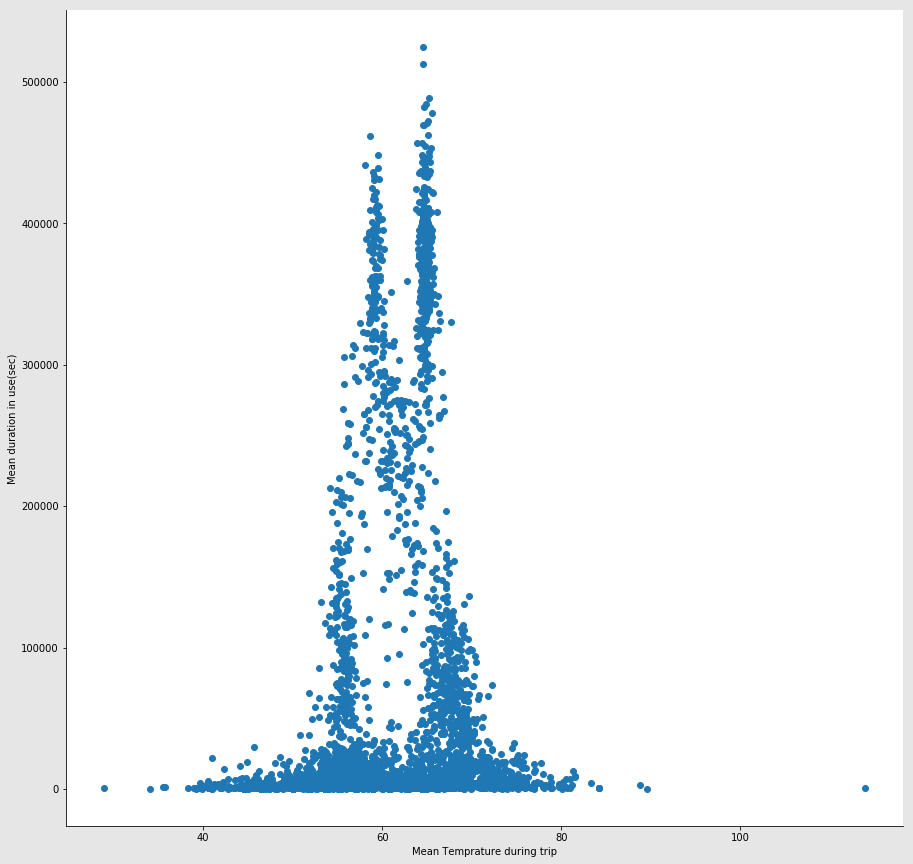

In [29]:
fig, ax = plt.subplots(figsize = [15,15], facecolor=[0.9,0.9,0.9])

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
#ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0

ax.yaxis.set_ticks_position('left')
#ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0

x_axis=life_weather.MeanTemp
y_axis=life_weather.Meanduration_sec

ax.scatter(x_axis, y_axis)
plt.xlabel('Mean Temprature during trip')
plt.ylabel('Mean duration in use(sec)')
#plt.title('Scatter plot of household head education & average enrollment rate (1997)')

plt.show()

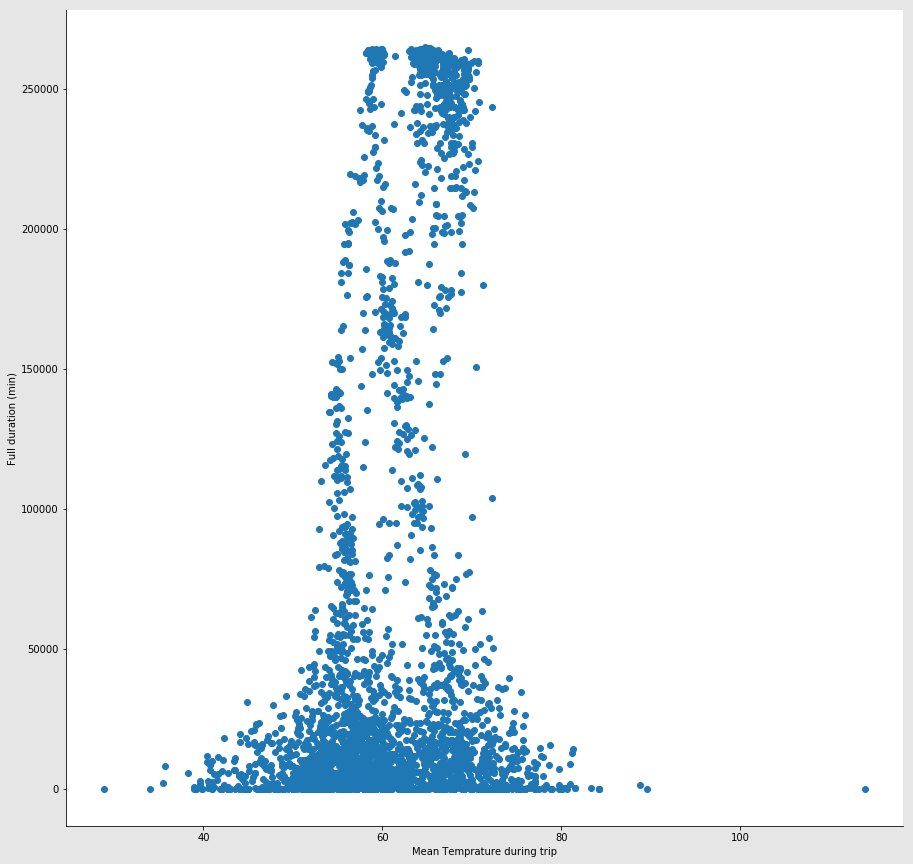

In [28]:
fig, ax = plt.subplots(figsize = [15,15], facecolor=[0.9,0.9,0.9])

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
#ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0

ax.yaxis.set_ticks_position('left')
#ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0

x_axis=life_weather.MeanTemp
y_axis=life_weather.Fullduration_min

ax.scatter(x_axis, y_axis)
plt.xlabel('Mean Temprature during trip')
plt.ylabel('Full duration (min)')
#plt.title('Scatter plot of household head education & average enrollment rate (1997)')

plt.show()

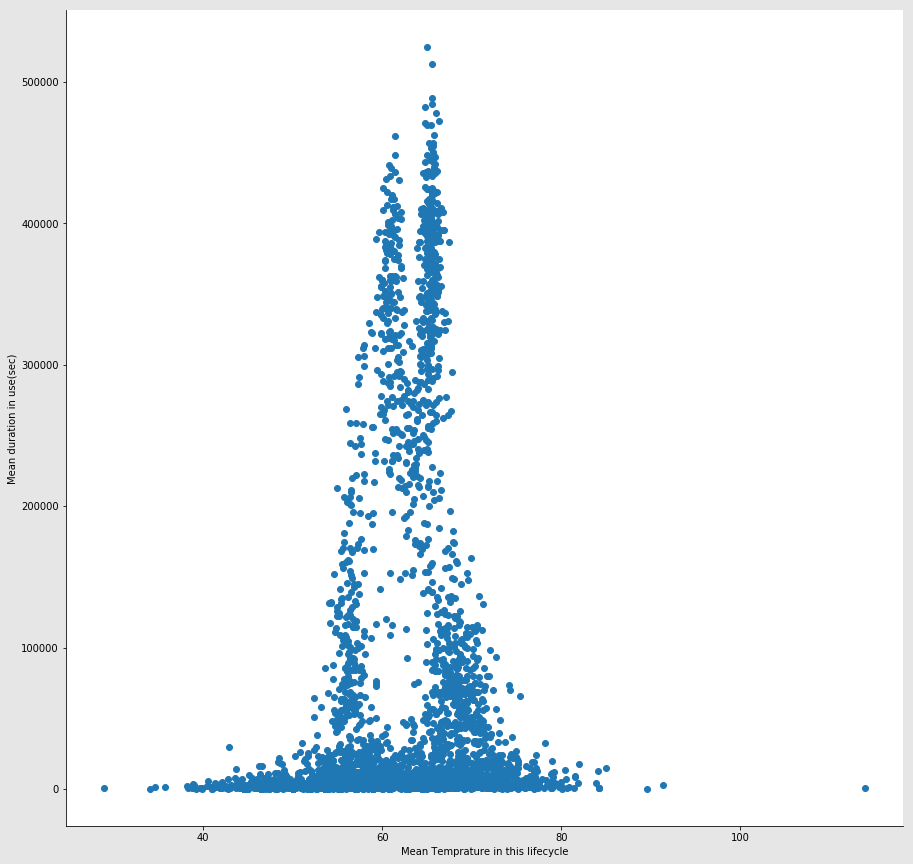

In [48]:
fig, ax = plt.subplots(figsize = [15,15], facecolor=[0.9,0.9,0.9])

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
#ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0

ax.yaxis.set_ticks_position('left')
#ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0

x_axis=life_weather.Tempbyduration
y_axis=life_weather.Meanduration_sec

ax.scatter(x_axis, y_axis)
plt.xlabel('Mean Temprature in this lifecycle')
plt.ylabel('Mean duration in use(sec)')
#plt.title('Scatter plot of household head education & average enrollment rate (1997)')

plt.show()

In [103]:
model1 = smf.ols(formula='Fullduration_min ~ MeanVisi', data=life_weather).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:       Fullduration_min   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     37.31
Date:                Sat, 25 Nov 2017   Prob (F-statistic):           1.12e-09
Time:                        23:16:05   Log-Likelihood:                -45345.
No. Observations:                3507   AIC:                         9.069e+04
Df Residuals:                    3505   BIC:                         9.071e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.045e+05   4909.155     21.282      0.0

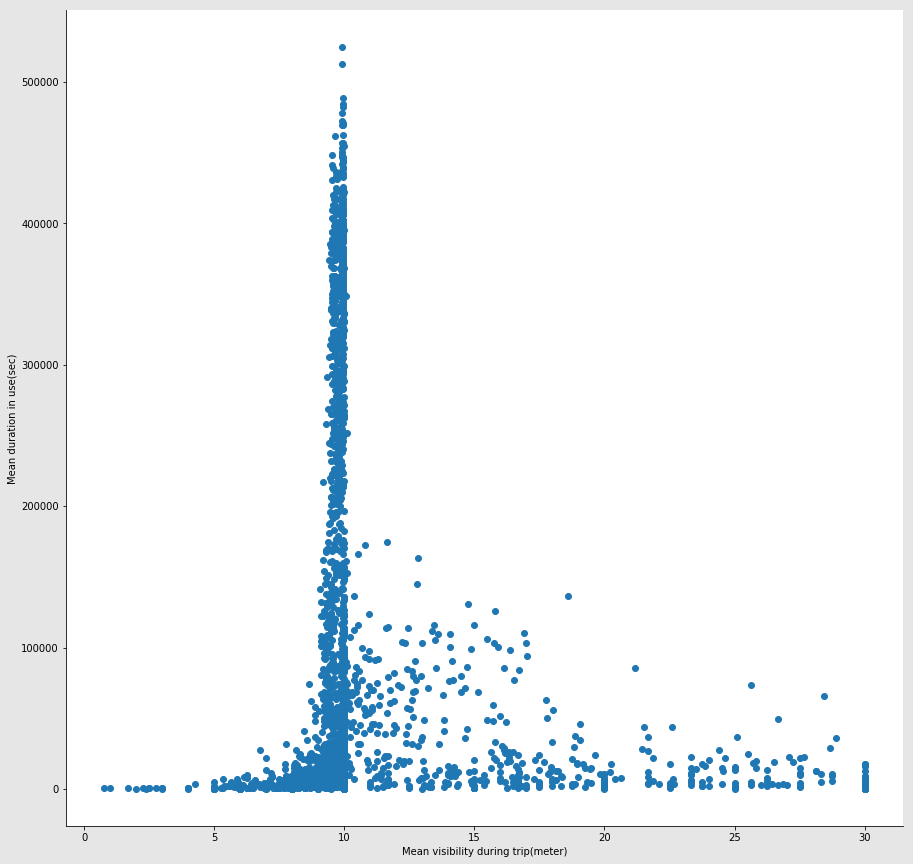

In [133]:
fig, ax = plt.subplots(figsize = [15,15], facecolor=[0.9,0.9,0.9])

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
#ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0

ax.yaxis.set_ticks_position('left')
#ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0

x_axis=life_weather.MeanVisi
y_axis=life_weather.Meanduration_sec

ax.scatter(x_axis, y_axis)
plt.xlabel('Mean visibility during trip(meter)')
plt.ylabel('Mean duration in use(sec)')
#plt.title('Scatter plot of household head education & average enrollment rate (1997)')

plt.show()

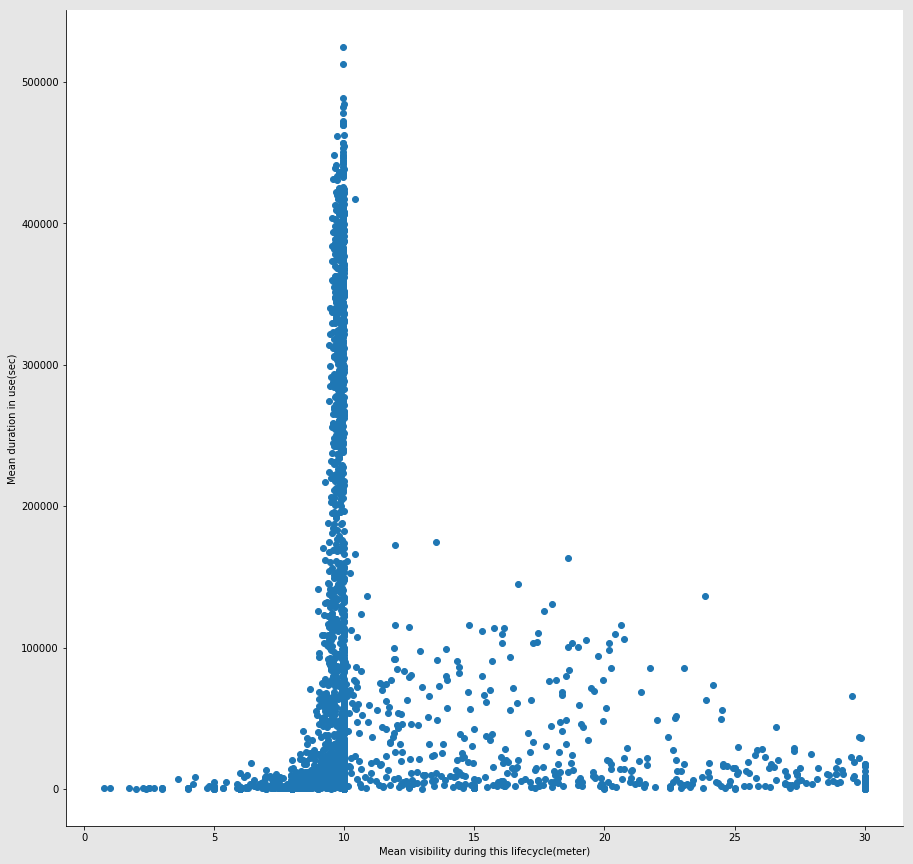

In [49]:
fig, ax = plt.subplots(figsize = [15,15], facecolor=[0.9,0.9,0.9])

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
#ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0

ax.yaxis.set_ticks_position('left')
#ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0

x_axis=life_weather.Visibyduration
y_axis=life_weather.Meanduration_sec

ax.scatter(x_axis, y_axis)
plt.xlabel('Mean visibility during this lifecycle(meter)')
plt.ylabel('Mean duration in use(sec)')
#plt.title('Scatter plot of household head education & average enrollment rate (1997)')

plt.show()

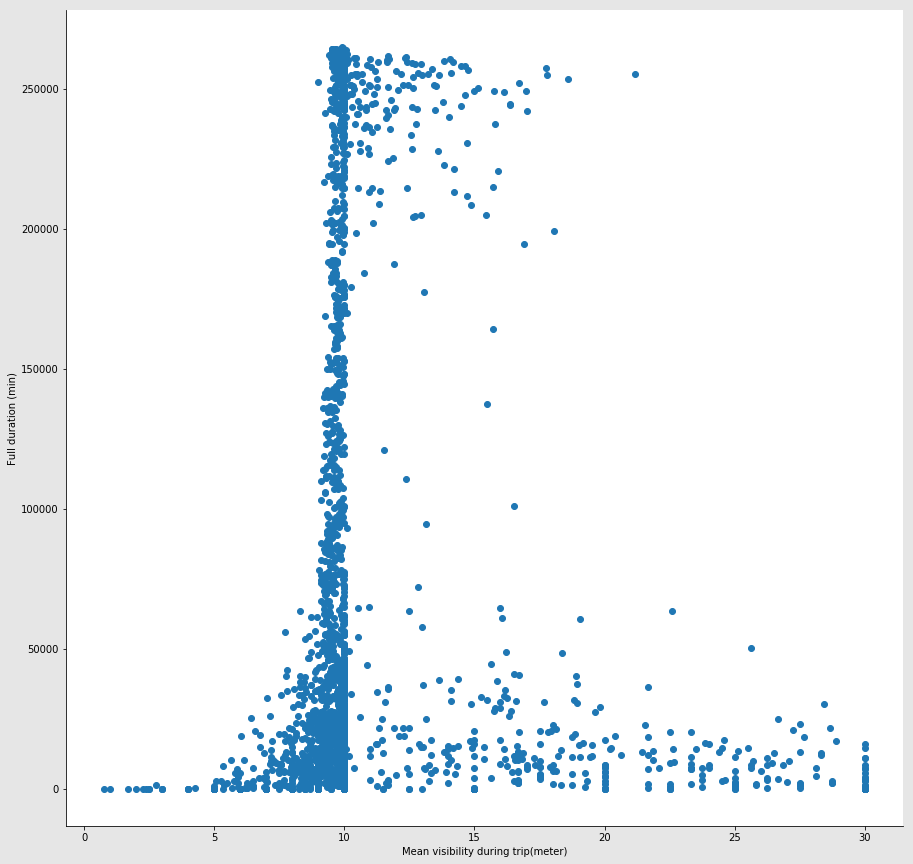

In [132]:
fig, ax = plt.subplots(figsize = [15,15], facecolor=[0.9,0.9,0.9])

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
#ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0

ax.yaxis.set_ticks_position('left')
#ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0

x_axis=life_weather.MeanVisi
y_axis=life_weather.Fullduration_min

ax.scatter(x_axis, y_axis)
plt.xlabel('Mean visibility during trip(meter)')
plt.ylabel('Full duration (min)')
#plt.title('Scatter plot of household head education & average enrollment rate (1997)')

plt.show()

### PCA

In [32]:
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

In [34]:
t = standardize(life_weather[['Tempbyduration', 'MeanTemp']])

In [35]:
t.head()

,Tempbyduration,MeanTemp
0,1.430413,1.862593
1,1.328290,1.254709
2,0.073885,-0.177875
3,-1.046711,-0.991407
4,-2.242973,-2.224031


In [36]:
pca = PCA(n_components=1)

In [37]:
pca.fit(t)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [38]:
pca.explained_variance_ratio_

array([ 0.98697144])

In [39]:
TempIndex = pca.fit_transform(t)

In [40]:
len(TempIndex)

3507

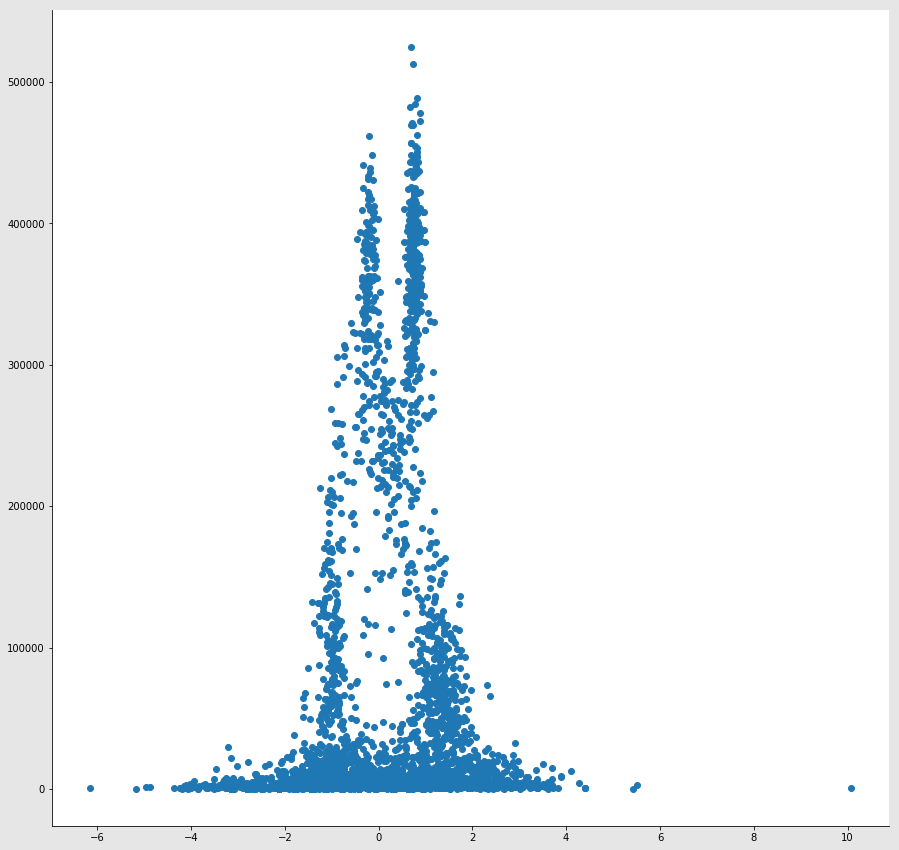

In [41]:
fig, ax = plt.subplots(figsize = [15,15], facecolor=[0.9,0.9,0.9])

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
#ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0

ax.yaxis.set_ticks_position('left')
#ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0

x_axis=TempIndex
y_axis=life_weather.Meanduration_sec

ax.scatter(x_axis, y_axis)
#plt.xlabel('the level of household head education')
#plt.ylabel('the average enrollment rate (1997)')
#plt.title('Scatter plot of household head education & average enrollment rate (1997)')

plt.show()

In [52]:
t = standardize(life_weather[['Tempbyduration', 'Humibyduration', 'Presbyduration', 'Dewbyduration']])

In [53]:
pca = PCA(n_components=2)
pca.fit(t)
WeatherIndex = pd.DataFrame(pca.fit_transform(t))
pca.explained_variance_ratio_

array([ 0.53310642,  0.31707837])

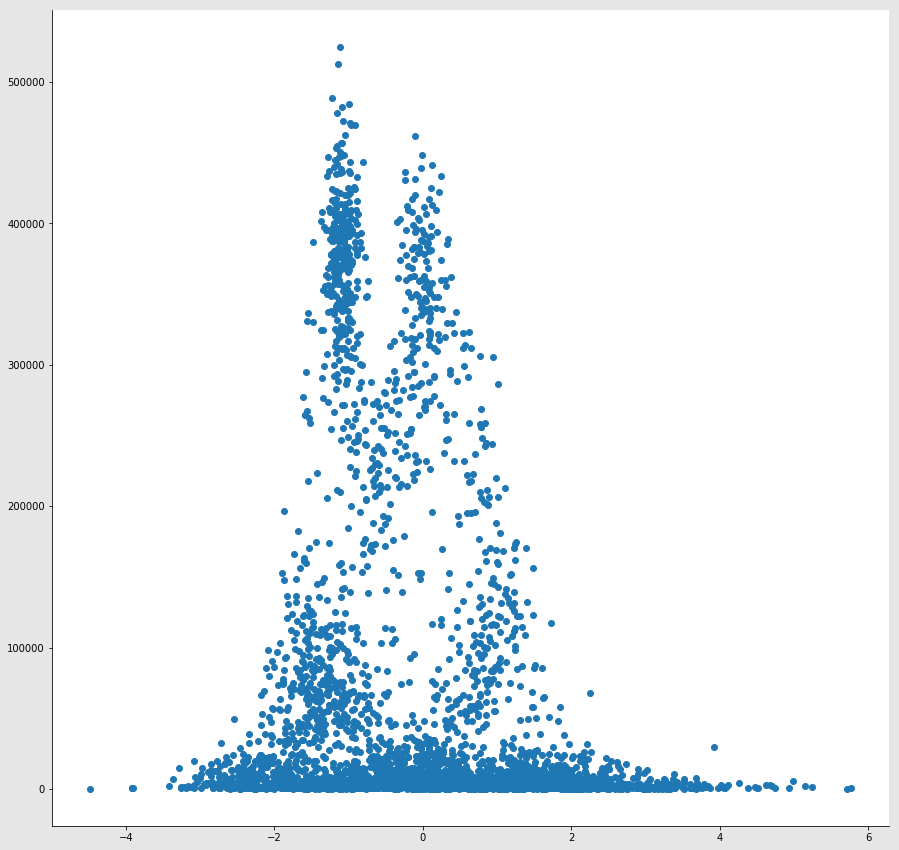

In [44]:
fig, ax = plt.subplots(figsize = [15,15], facecolor=[0.9,0.9,0.9])

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
#ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0

ax.yaxis.set_ticks_position('left')
#ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0

x_axis=WeatherIndex[0]
y_axis=life_weather.Meanduration_sec

ax.scatter(x_axis, y_axis)
#plt.xlabel('the level of household head education')
#plt.ylabel('the average enrollment rate (1997)')
#plt.title('Scatter plot of household head education & average enrollment rate (1997)')

plt.show()

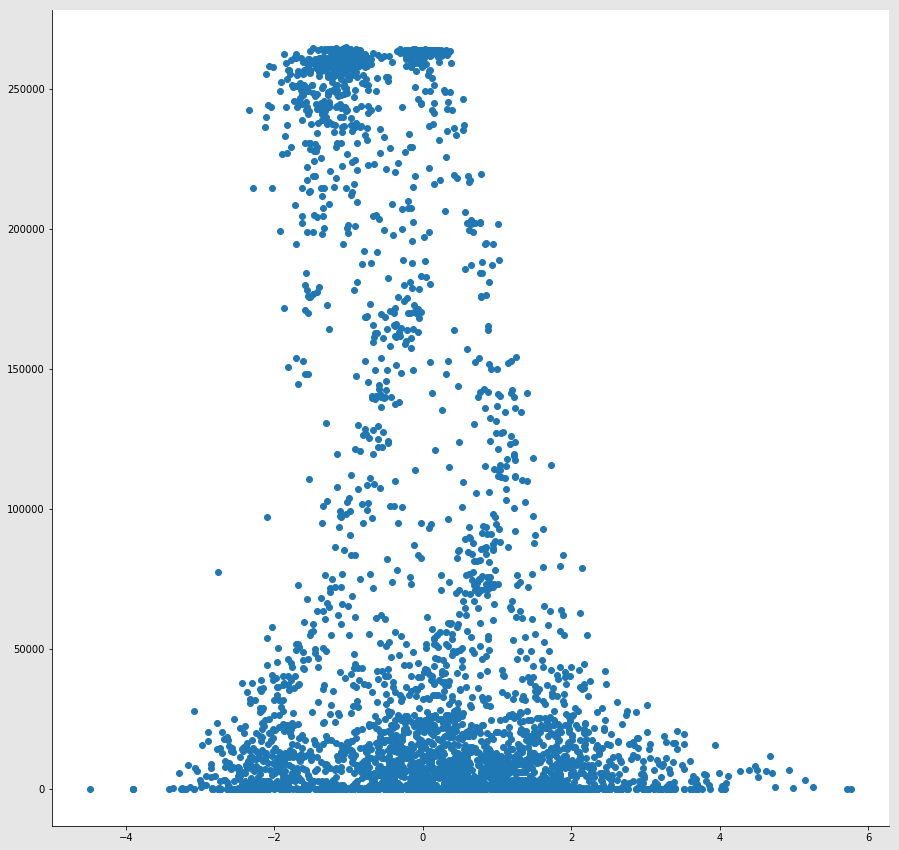

In [45]:
fig, ax = plt.subplots(figsize = [15,15], facecolor=[0.9,0.9,0.9])

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
#ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0

ax.yaxis.set_ticks_position('left')
#ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0

x_axis=WeatherIndex[0]
y_axis=life_weather.Fullduration_min

ax.scatter(x_axis, y_axis)
#plt.xlabel('the level of household head education')
#plt.ylabel('the average enrollment rate (1997)')
#plt.title('Scatter plot of household head education & average enrollment rate (1997)')

plt.show()

In [46]:
from mpl_toolkits.mplot3d import Axes3D

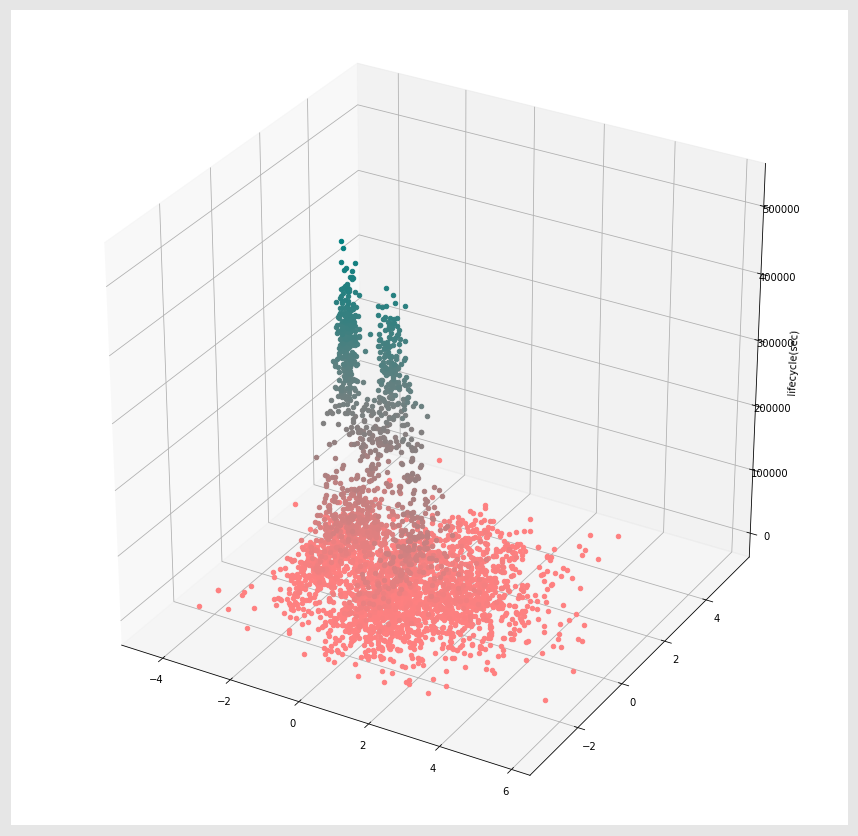

In [54]:
fig = plt.figure(figsize = [15,15], facecolor=[0.9,0.9,0.9])
ax = fig.gca(projection='3d')
data = zip(WeatherIndex[0], WeatherIndex[1], life_weather.Meanduration_sec)
for x,y,z in data:
    col = ((life_weather.Meanduration_sec.max()-z)/(life_weather.Meanduration_sec.max()-life_weather.Meanduration_sec.min()))
    #col_value = 'rgb(127, 127, {})'.format(col)
    
    ax.scatter(x,y,z,c=[(col,0.5,0.5),], marker='o')
#ax.set_xlabel('average number of rooms per dwelling (rooms)')
#ax.set_ylabel('weighted distances to five Boston employment centres (miles)')
ax.set_zlabel('lifecycle(sec)')
#plt.title('3D Scatter plot of housing prices, average number of rooms and weigthed distance')
plt.show()

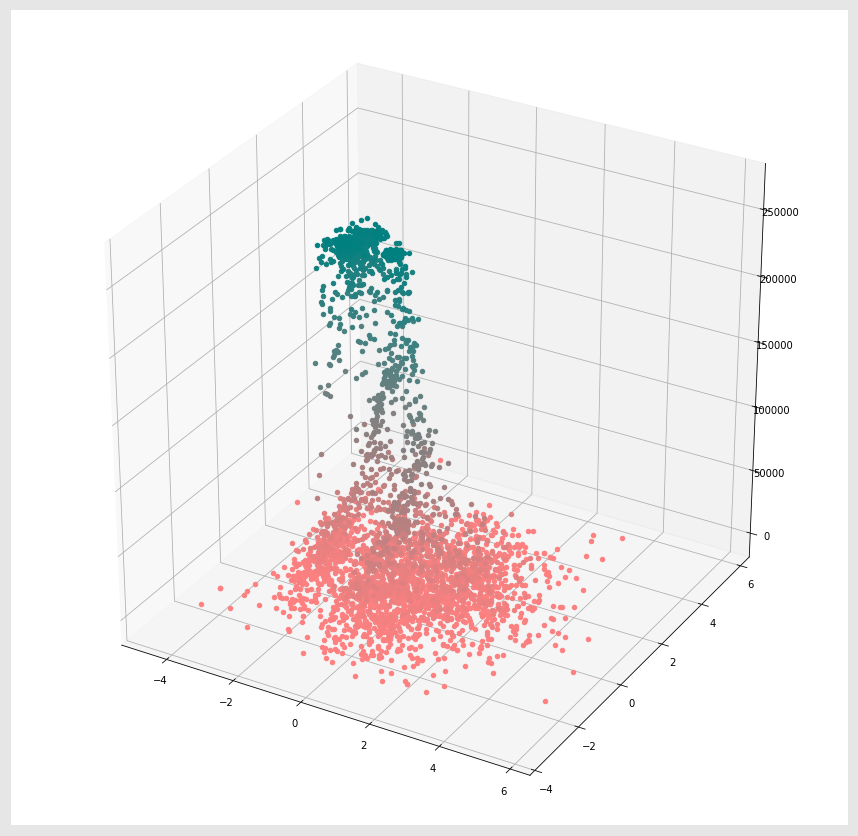

In [128]:
fig = plt.figure(figsize = [15,15], facecolor=[0.9,0.9,0.9])
ax = fig.gca(projection='3d')
data = zip(WeatherIndex[0], WeatherIndex[1], life_weather.Fullduration_min)
for x,y,z in data:
    col = ((life_weather.Fullduration_min.max()-z)/(life_weather.Fullduration_min.max()-life_weather.Fullduration_min.min()))
    #col_value = 'rgb(127, 127, {})'.format(col)
    
    ax.scatter(x,y,z,c=[(col,0.5,0.5),], marker='o')
#ax.set_xlabel('average number of rooms per dwelling (rooms)')
#ax.set_ylabel('weighted distances to five Boston employment centres (miles)')
#ax.set_zlabel('median housing price (*1000 dollar)')
#plt.title('3D Scatter plot of housing prices, average number of rooms and weigthed distance')
plt.show()

In [91]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR

In [92]:
clf = SVR()

In [93]:
scores = cross_val_score(clf, TempIndex, life_cycle.duration, cv=5)
scores          

array([-0.07465855, -0.08028495, -1.75752222, -1.20854482, -0.08181765])

In [94]:
life_cycle.duration

0        28972
1        35732
2         7451
3          683
4         2665
5        12348
6       136179
7        14366
8        30148
9         5028
10       65944
11       20135
12       25782
13      111882
14       73637
15       29111
16       32215
17        2699
18         462
19       15229
20         357
21       10267
22       90966
23        9742
24        6818
25       18672
26       34026
27       32718
28        3249
29       52001
         ...  
2543     19779
2544       558
2545     99370
2546     20580
2547       656
2548      8649
2549      2360
2550     78158
2551     22166
2552      9635
2553      5993
2554      2100
2555     18362
2556    123924
2557      3293
2558     28935
2559      3459
2560      8121
2561    174864
2562     25821
2563     29883
2564     62652
2565     36611
2566      3808
2567      7286
2568      6868
2569     65751
2570     49322
2571       616
2572     71507
Name: duration, Length: 2573, dtype: int64

In [95]:
life_cycle.head()

,bike_id,duration,Temperature,MeanTemp,Humidity,MeanHumi,Dewpoint,MeanDew,Pressure,MeanPres,Visibility,MeanVisi
0,100_0,28972,967.70,74.438462,8.1850,0.629615,764.70,58.823077,388.330000,29.871538,372.5,28.653846
1,100_1,35732,630.00,70.000000,3.8650,0.429444,412.20,45.800000,269.845000,29.982778,260.0,28.888889
2,100_2,7451,649.00,59.000000,6.8300,0.620909,487.00,44.272727,331.076667,30.097879,100.2,9.109091
3,100_3,683,98.20,49.100000,1.0300,0.515000,64.00,32.000000,60.210000,30.105000,18.0,9.000000
4,100_4,2665,286.05,57.210000,3.0675,0.613500,200.05,40.010000,150.842500,30.168500,50.0,10.000000


In [96]:
life = pd.read_csv('life_weather.csv')

In [100]:
station = pd.read_csv('station.csv')

In [102]:
life.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,city,Temperature,Humidity,Dewpoint,Pressure,Visibility
0,0,0,207,4298,460,2013-08-29 12:02:00,Cowper at University,37,2013-08-29 12:10:00,9_0,35,9_0,Subscriber,94025,Palo Alto,73.4,0.73,64.4,30.060,30.0
1,1,1,1354,6340,2746,2013-08-30 18:48:00,University and Emerson,35,2013-08-30 19:34:00,9_0,35,9_0,Customer,94301,Palo Alto,73.4,0.67,61.7,29.925,30.0
2,2,2,1717,7123,996,2013-08-31 15:39:00,University and Emerson,35,2013-08-31 15:56:00,9_0,36,9_0,Customer,10003,Palo Alto,75.2,0.65,62.6,29.920,30.0
3,3,3,1837,7384,1398,2013-08-31 19:02:00,California Ave Caltrain Station,36,2013-08-31 19:26:00,9_0,35,9_0,Customer,10036,Palo Alto,68.0,0.69,52.0,29.910,30.0
4,4,4,1995,6701,9826,2013-08-31 11:45:00,University and Emerson,35,2013-08-31 14:29:00,9_0,35,9_0,Customer,NaN,Palo Alto,73.4,0.67,61.7,29.965,30.0


In [101]:
station.head()

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


In [149]:
def comparecity(dataset, station):
    trip_list = []
    for i in range(len(dataset)):
        temp = dataset.iloc[i]
        if (station[station['id'] == temp['start_station_id']]['city'].values != 
            station[station['id'] == temp['end_station_id']]['city'].values):
            #print(i)
            trip_list.append(temp['id'])
    return trip_list

In [138]:
temp = life.iloc[29]
temp['start_station_id']

38

In [139]:
t1 = station[station['id'] == temp['start_station_id']]['city'].values

In [142]:
t1

array(['Palo Alto'], dtype=object)

In [140]:
t2 =station[station['id'] == temp['end_station_id']]['city'].values

In [143]:
t2

array(['Mountain View'], dtype=object)

In [146]:
if t1 != t2:
    print(temp['id'])

381251


In [150]:
trip_list = comparecity(life, station)

In [152]:
len(trip_list)

482

In [153]:
import re

In [158]:
re.search(r'-\d+', '94040-1724')

<_sre.SRE_Match object; span=(5, 10), match='-1724'>